In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [67]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
import shap

In [3]:
# Changes the font parameters for the charts
params = {'legend.fontsize': 14,
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize': 10,
         'ytick.labelsize': 10}
plt.rcParams.update(params)

In [4]:
params = {}

In [316]:
## Change to the 'Datasets directory'
initial_dir = os.getcwd()
data_folder = os.path.join(os.getcwd(), 'Datasets')
data_path = os.path.join(data_folder, "data")

In [317]:
target = 'cases'
target_date = '2020-08-01'
drop_cols = ['dateRep', 'deaths', 'deaths18']

In [318]:
## Import the train and test dataframes. Drop the 'dateRep' column as it is not need for the prediciton.
train_X = pd.read_csv(os.path.join(data_path, "train", 'train_x.csv'), index_col=0).drop(columns=['dateRep', 'flag']).sample(frac=1, random_state=1)
train_y = pd.read_csv(os.path.join(data_path, "train", 'train_y.csv'), index_col=0).drop(columns=drop_cols).sample(frac=1, random_state=1)
## '.sample' randomises the dataframe as the validation test below will take the bottom 20% of the data
## 'frac=1' means it will use all the data and 'random_state=1' keeps the resample consistent between df's
test_x = pd.read_csv(os.path.join(data_path, "test", 'test_x.csv'), index_col=0).drop(columns=['dateRep', 'flag']).sample(frac=1, random_state=1)
test_y = pd.read_csv(os.path.join(data_path, "test", 'test_y.csv'), index_col=0).drop(columns=drop_cols).sample(frac=1, random_state=1)

In [320]:
train_X.head()

driving    transit  walking        DIY       Cafe  online_lesson  \
1858    47.23  20.100000    30.80  76.846955  53.095074      28.427976   
3083   162.39  76.540000   104.50  66.121797  87.318590      68.396742   
2640   109.41  55.440000   102.60  56.000000  63.000000       6.000000   
2033    48.90  63.982356    55.94  60.000000  77.000000      29.000000   
3186   147.61  80.590000   159.46  58.950469  68.795279       4.348866   

            Bar  Home_Workout     Sewing  Restaurant  _Europe  _Rest_of_World  \
1858  74.061688     28.352936  83.742678    5.762302        1               0   
3083  87.758754      4.213517  63.820278   72.672494        1               0   
2640  92.000000     21.000000  69.000000   81.000000        1               0   
2033  38.000000      0.000000  76.000000   24.000000        0               1   
3186  91.283621     15.196199  61.415746   98.502389        1               0   

      _United_Kingdom  
1858                0  
3083                0  
2640                0  
2033                0  
3186                0

In [321]:
## Initialise Scalars so that data is normalised to 1.
sc_x = StandardScaler()
sc_y = StandardScaler()
## Normalise the data using the scalar.
X_train = sc_x.fit_transform(train_X)
X_test = sc_x.transform(test_x)

y_train = sc_y.fit_transform(train_y)
y_test = sc_y.transform(test_y)

In [322]:
## Calculate the number of input 'test' columns.
input_neuron = len(test_x.columns)
input_neuron

13

In [323]:
## Setup the model for training.
classifier = Sequential()
classifier.add(Dense(output_dim = 250, init = 'uniform', activation = 'relu', input_dim = input_neuron))
classifier.add(Dense(output_dim = 150, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 75, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 30, init = 'uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

classifier.compile(optimizer = 'Nadam', loss = 'mean_squared_error', metrics = ["mae"])
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000, validation_split= 0.2)

Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13, units=250, kernel_initializer="uniform")`
Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=150, kernel_initializer="uniform")`
Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=75, kernel_initializer="uniform")`
Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=30, kernel_initializer="uniform")`
Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1, kernel_initializer="uniform")`


Train on 2557 samples, validate on 640 samples
Epoch 1/1000
2557/2557 [==============================] - 2s 660us/step - loss: 0.6698 - mae: 0.3794 - val_loss: 0.4293 - val_mae: 0.3022
Epoch 2/1000
2557/2557 [==============================] - 1s 318us/step - loss: 0.3554 - mae: 0.2840 - val_loss: 0.2818 - val_mae: 0.2558
Epoch 3/1000
2557/2557 [==============================] - 1s 337us/step - loss: 0.2674 - mae: 0.2491 - val_loss: 0.1992 - val_mae: 0.2247
Epoch 4/1000
2557/2557 [==============================] - 1s 311us/step - loss: 0.1942 - mae: 0.2165 - val_loss: 0.1406 - val_mae: 0.1963
Epoch 5/1000
2557/2557 [==============================] - 1s 322us/step - loss: 0.1824 - mae: 0.1987 - val_loss: 0.1465 - val_mae: 0.1932
Epoch 6/1000
2557/2557 [==============================] - 1s 331us/step - loss: 0.1511 - mae: 0.1771 - val_loss: 0.1386 - val_mae: 0.1894
Epoch 7/1000
2557/2557 [==============================] - 1s 402us/step - loss: 0.1539 - mae: 0.1788 - val_loss: 0.1823 - val

In [324]:
model_path = os.path.join(data_folder, "model")
# Check if the relevant folders exist and create them if not
if os.path.exists(model_path) is False:
    os.mkdir(model_path)
# Export the model for future use to that you don't need to spend time training the model again
pickle.dump(classifier, open(os.path.join(model_path, "ReinNN_UK_Plus.pkl"), "wb"))

In [325]:
"""model_path = os.path.join(data_folder, "model")
# Import the exported model in future runs using the greyed out line below (remove the hastag)
model = pickle.load(open(os.path.join(model_path, "ReinNN.pkl"), "rb"))"""

'model_path = os.path.join(data_folder, "model")\n# Import the exported model in future runs using the greyed out line below (remove the hastag)\nmodel = pickle.load(open(os.path.join(model_path, "ReinNN.pkl"), "rb"))'

In [326]:
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.DeepExplainer(classifier, X_train)
shap_values = explainer.shap_values(X_train)

In [327]:
names= train_X.columns.to_list()
#names = 

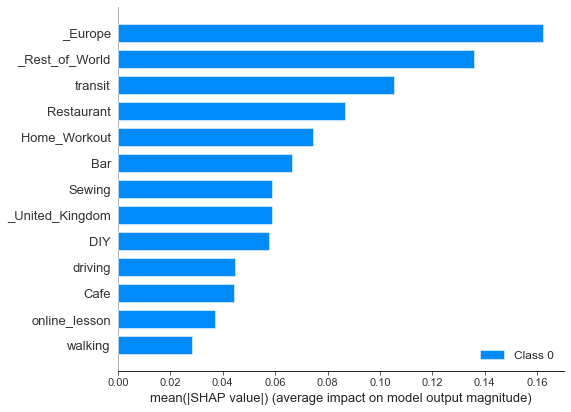

In [328]:
shap.summary_plot(shap_values, X_train, names, plot_type="bar", show=False)
#plt.savefig('SHAP_Feature_Score_300dpi.png',format = "png",dpi = 300,bbox_inches = 'tight')

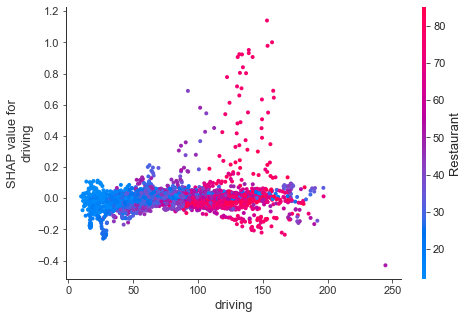

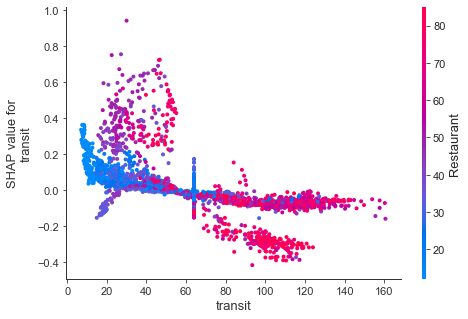

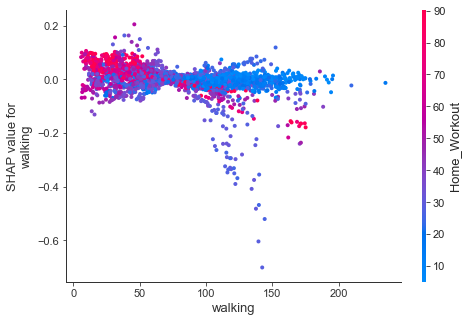

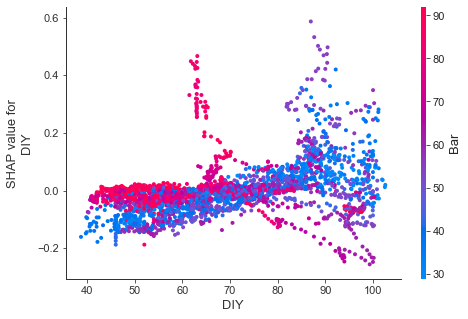

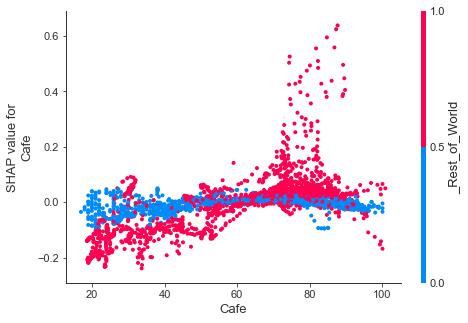

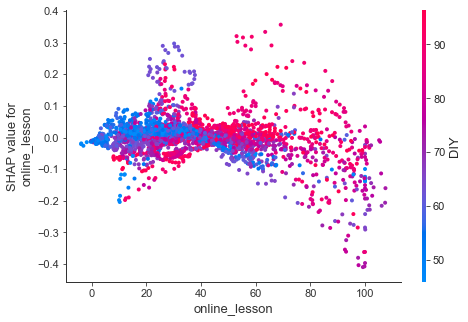

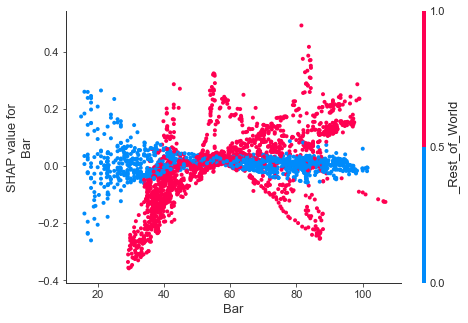

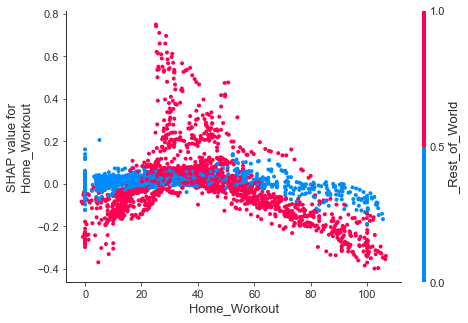

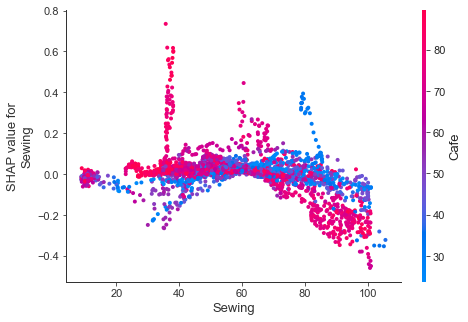

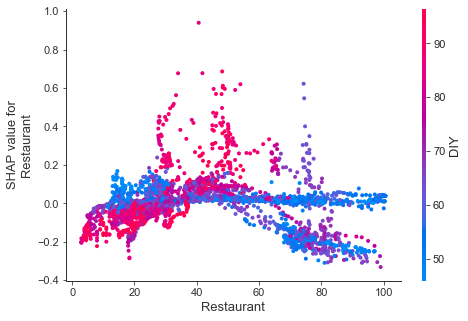

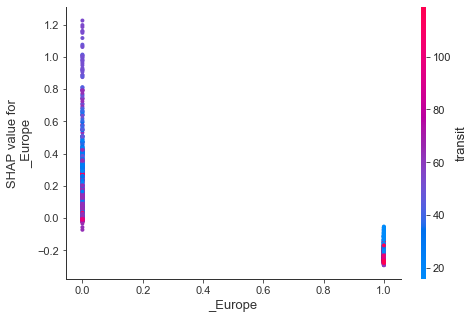

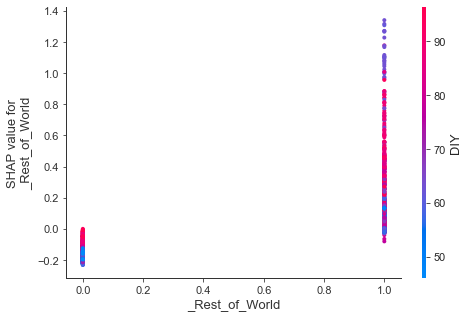

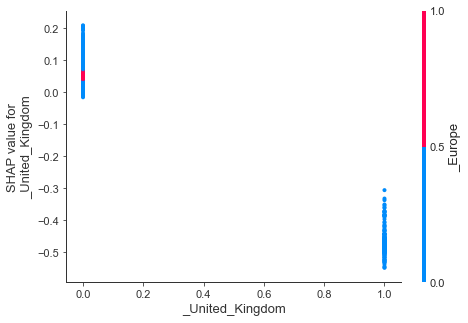

In [329]:
for i in names:
    # SHAP asigned value for an input parameter vs its value. Coloured by a random input feature
    shap.dependence_plot(i, shap_values[0], train_X)

In [330]:
shap.force_plot(explainer.expected_value, shap_values[0], train_X)

shap.force_plot is slow for many thousands of rows, try subsampling your data.


In [331]:
# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], test_x.iloc[0,:], link="logit")

In [332]:
# Calculate the predicted deaths according to the neural net model
test_x["deaths_pred"] = sc_y.inverse_transform(classifier.predict(X_test))
# Calculate the predicted deaths according to the neural net model
train_X["deaths_pred"] = sc_y.inverse_transform(classifier.predict(X_train))
#df1 = pd.concat([test_x, train_X], axis=1)
df= train_X.merge(train_y,left_index=True, right_index=True)
# We merge the test dataframes together
df1 = test_x.merge(test_y, left_index=True, right_index=True)
# We append the test data to the train data
df = df.append(df1)

In [353]:
df.head(3)

driving  transit  walking        DIY       Cafe  online_lesson  \
1858    47.23    20.10     30.8  76.846955  53.095074      28.427976   
3083   162.39    76.54    104.5  66.121797  87.318590      68.396742   
2640   109.41    55.44    102.6  56.000000  63.000000       6.000000   

            Bar  Home_Workout     Sewing  Restaurant  _Europe  _Rest_of_World  \
1858  74.061688     28.352936  83.742678    5.762302        1               0   
3083  87.758754      4.213517  63.820278   72.672494        1               0   
2640  92.000000     21.000000  69.000000   81.000000        1               0   

      _United_Kingdom  deaths_pred  cases  
1858                0  1446.723022   1402  
3083                0  1784.922241      0  
2640                0   129.918304     69

In [333]:
## Calculate the mean absolute error and R2 scores for the predicted vs real data.
print(f"DL MAE score: {np.round(mean_absolute_error(df1[target], df1.deaths_pred))}")
print(f"DL R2 score: {np.round(r2_score(df1[target], df1.deaths_pred), 4)}")

DL MAE score: 5676.0
DL R2 score: 0.5447


In [334]:
# Again read in the 'covid19_df' as df_global
df_global = pd.read_csv(os.path.join(data_folder, "Data_Export", "covid19_df.csv"), index_col=0)
df_global['dateRep'] = pd.to_datetime(df_global['dateRep'])
# Merge in the 'deaths_pred' prediction column to compare to the real data
df_global = df_global.merge(df["deaths_pred"], left_index=True, right_index=True, how='left')

In [335]:
#df_global['deaths_pred'] = df_global.groupby('countriesAndTerritories')['deaths_pred'].shift(periods=18)

In [342]:
# Compute the prediction error
df_global['deaths_pred_error'] = df_global[target] - df_global['deaths_pred']
# Compute the cumulative error for each country individually
df_global['cumulative_error'] = df_global.loc[df_global['dateRep'] > target_date].groupby('countriesAndTerritories')['deaths_pred_error'].cumsum()

In [354]:
# Recreate the 'top_count' list to create the graphs below
#top_count = list(df_global.groupby('countriesAndTerritories')['deaths'].sum().sort_values(ascending=False).iloc[:20].keys())
top_count = ['Europe', 'United_Kingdom', 'Rest_of_World']

In [344]:
#df_global.loc[df_global['countriesAndTerritories']=='United_Kingdom'].tail()

Text(0, 0.5, 'Number of Daily Cases')

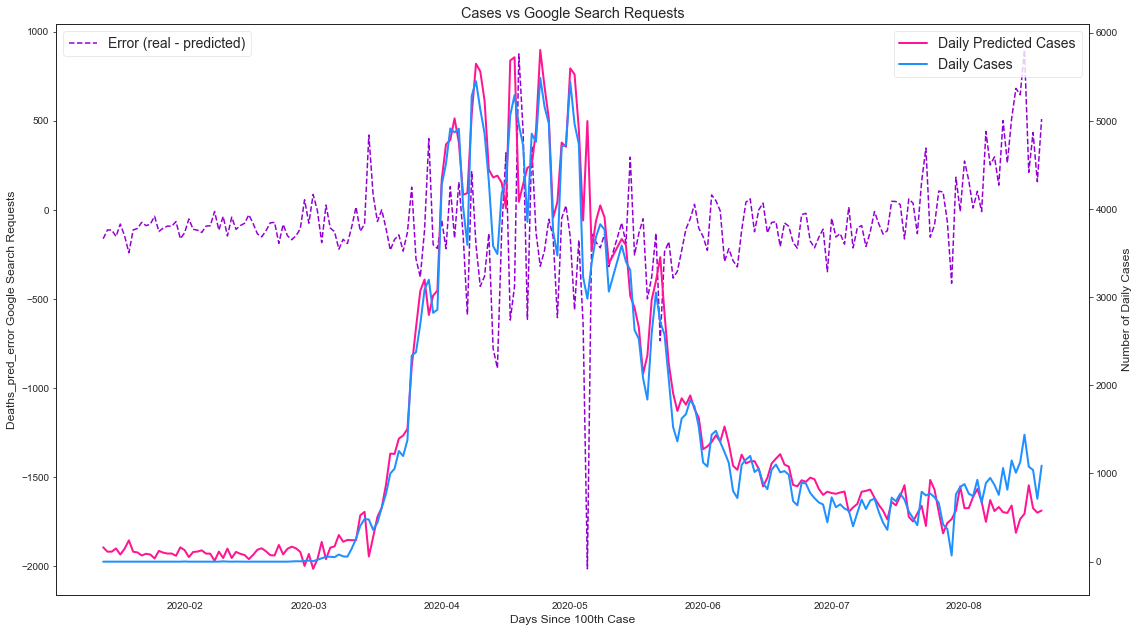

In [349]:
# Visualising the features.
fig, ax1 = plt.subplots()
j = 'deaths_pred_error'
country = 'United_Kingdom'
ax2 = ax1.twinx()
ax1.plot(df_global.loc[df_global['countriesAndTerritories']==country]['dateRep'], df_global.loc[df_global['countriesAndTerritories']==country][j], label='Error (real - predicted)', c='darkviolet', linestyle='dashed')
ax2.plot(df_global.loc[df_global['countriesAndTerritories']==country]['dateRep'], df_global.loc[df_global['countriesAndTerritories']==country]['deaths_pred'], label= 'Daily Predicted ' + target.capitalize(), c='deeppink', linewidth=2)
ax2.plot(df_global.loc[df_global['countriesAndTerritories']==country]['dateRep'], df_global.loc[df_global['countriesAndTerritories']==country]['cases'], label='Daily ' + target.capitalize(), c='dodgerblue', linewidth=2)

plt.title(target.capitalize() + ' vs Google Search Requests')
#plt.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
fig.set_size_inches(18.5, 10.5)



ax1.set_xlabel('Days Since 100th Case')
ax1.set_ylabel(j.capitalize() + ' Google Search Requests')
ax2.set_ylabel('Number of Daily ' + target.capitalize())
#plt.savefig(i + 'Feature.jpeg', dpi=600)"""

In [301]:
sns.set_style("white")

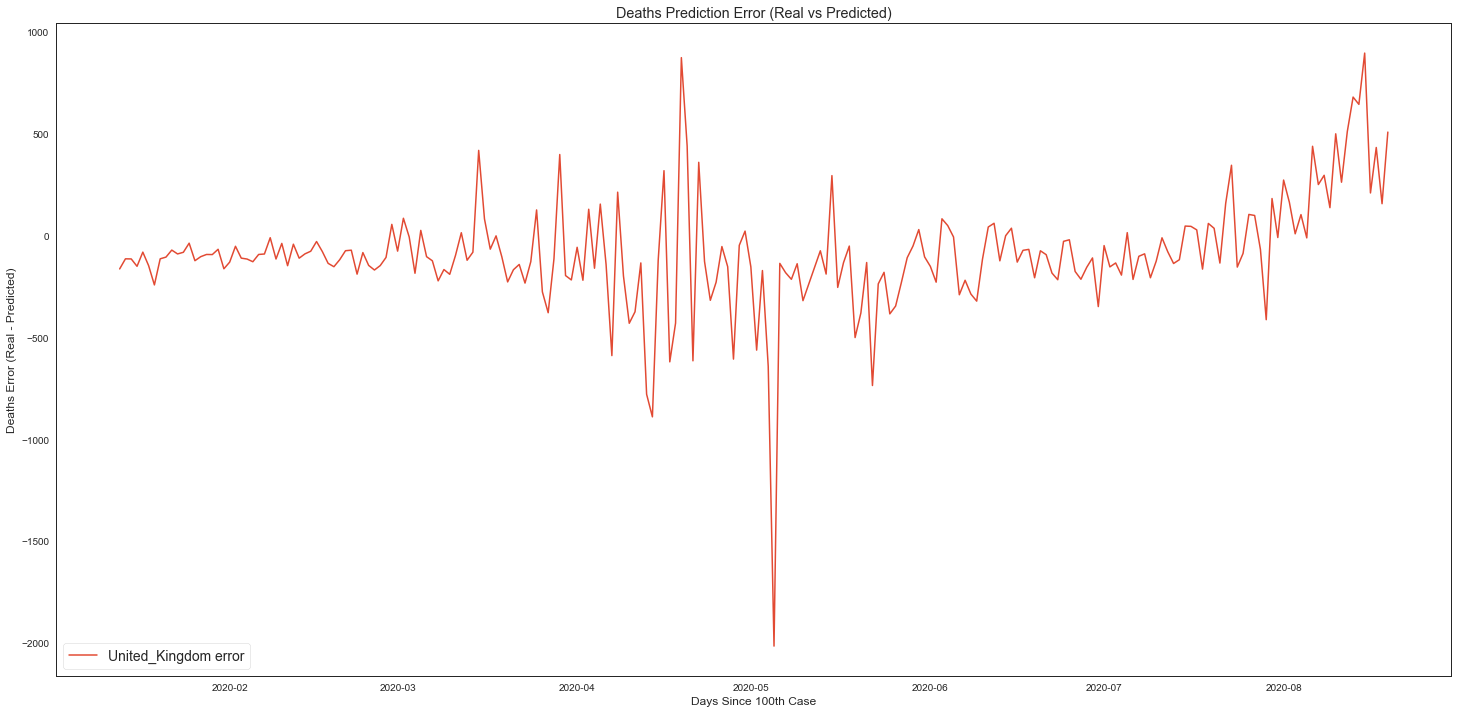

In [350]:
# Visualising the Linear Regression results
country = 'United_Kingdom'
plt.figure(figsize=(25, 12))
plt.plot(df_global[df_global["countriesAndTerritories"] == country]["dateRep"],
         df_global[df_global["countriesAndTerritories"] == country]['deaths_pred_error'], label=f"{country} error")
plt.title('Deaths Prediction Error (Real vs Predicted)')
plt.xlabel('Days Since 100th Case')
plt.ylabel('Deaths Error (Real - Predicted)')
#plt.grid()
plt.legend(ncol=2, loc=3)

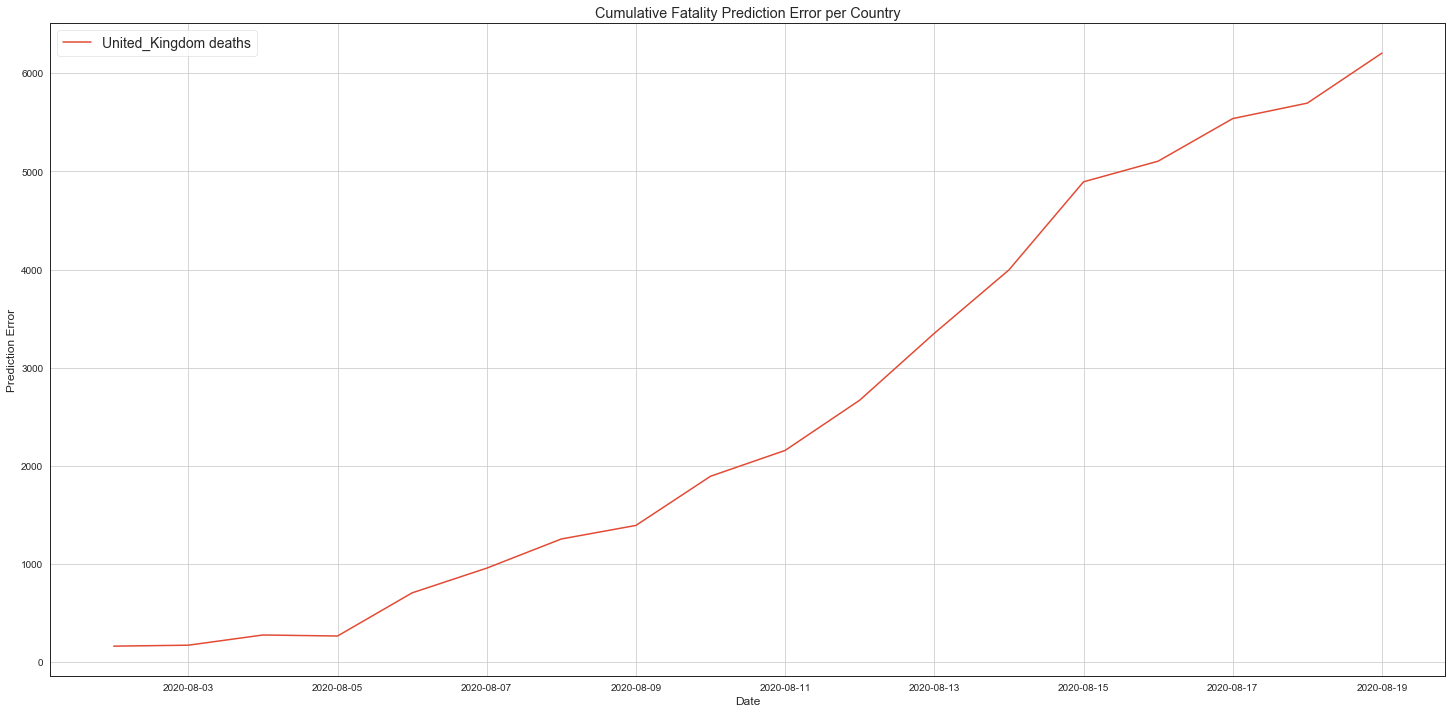

In [355]:
# Visualising the Linear Regression results
plt.figure(figsize=(25, 12))
country = 'United_Kingdom'
plt.plot(df_global[df_global["countriesAndTerritories"] == country]["dateRep"],
         df_global[df_global["countriesAndTerritories"] == country]['cumulative_error'], label=f"{country} deaths")
plt.title('Cumulative Fatality Prediction Error per Country')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.grid()
plt.legend(ncol=2)
#plt.savefig('cumulative_error_20_nn_countries_dpi300.jpeg', dpi=300)

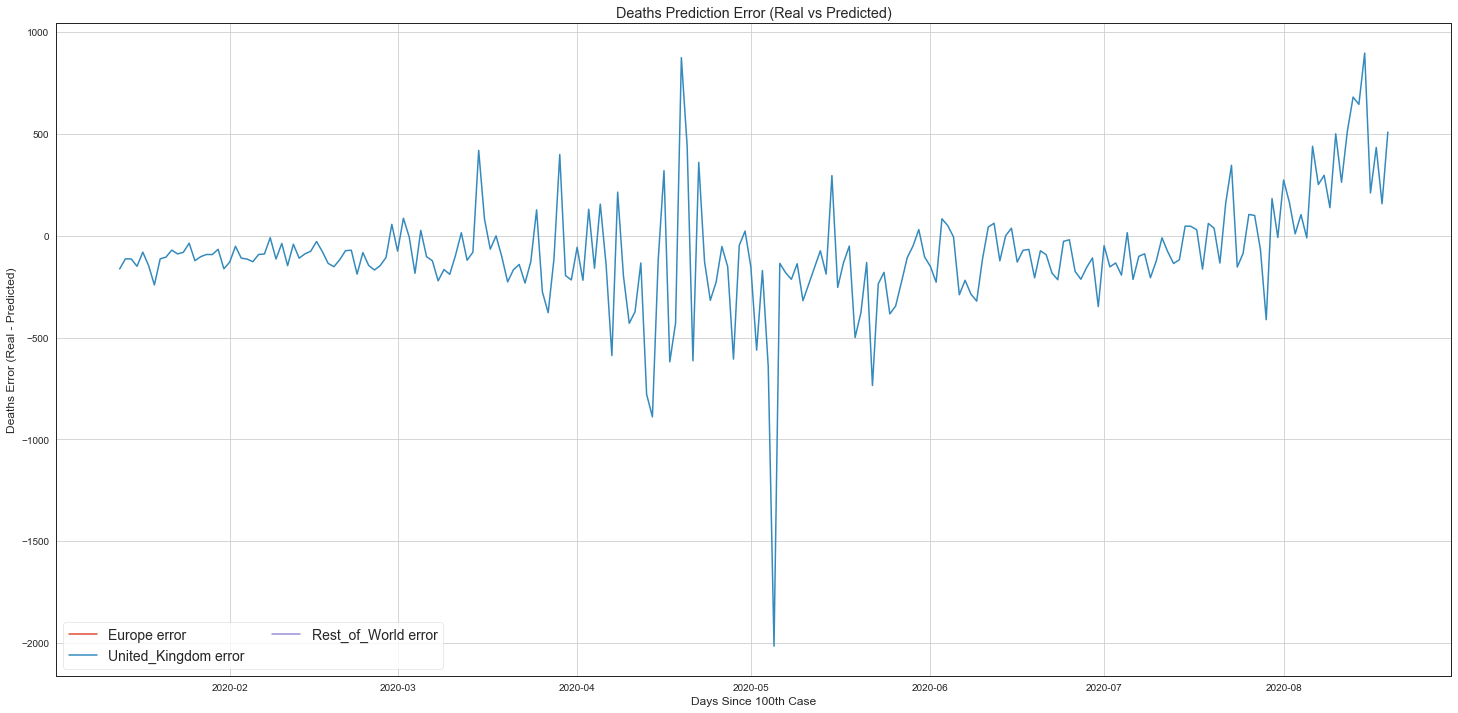

In [356]:
# Visualising the Linear Regression results
plt.figure(figsize=(25, 12))
for country in top_count:
    plt.plot(df_global[df_global["countriesAndTerritories"] == country]["dateRep"],
             df_global[df_global["countriesAndTerritories"] == country]['deaths_pred_error'], label=f"{country} error")
plt.title('Deaths Prediction Error (Real vs Predicted)')
plt.xlabel('Days Since 100th Case')
plt.ylabel('Deaths Error (Real - Predicted)')
plt.grid()
plt.legend(ncol=2, loc=3)

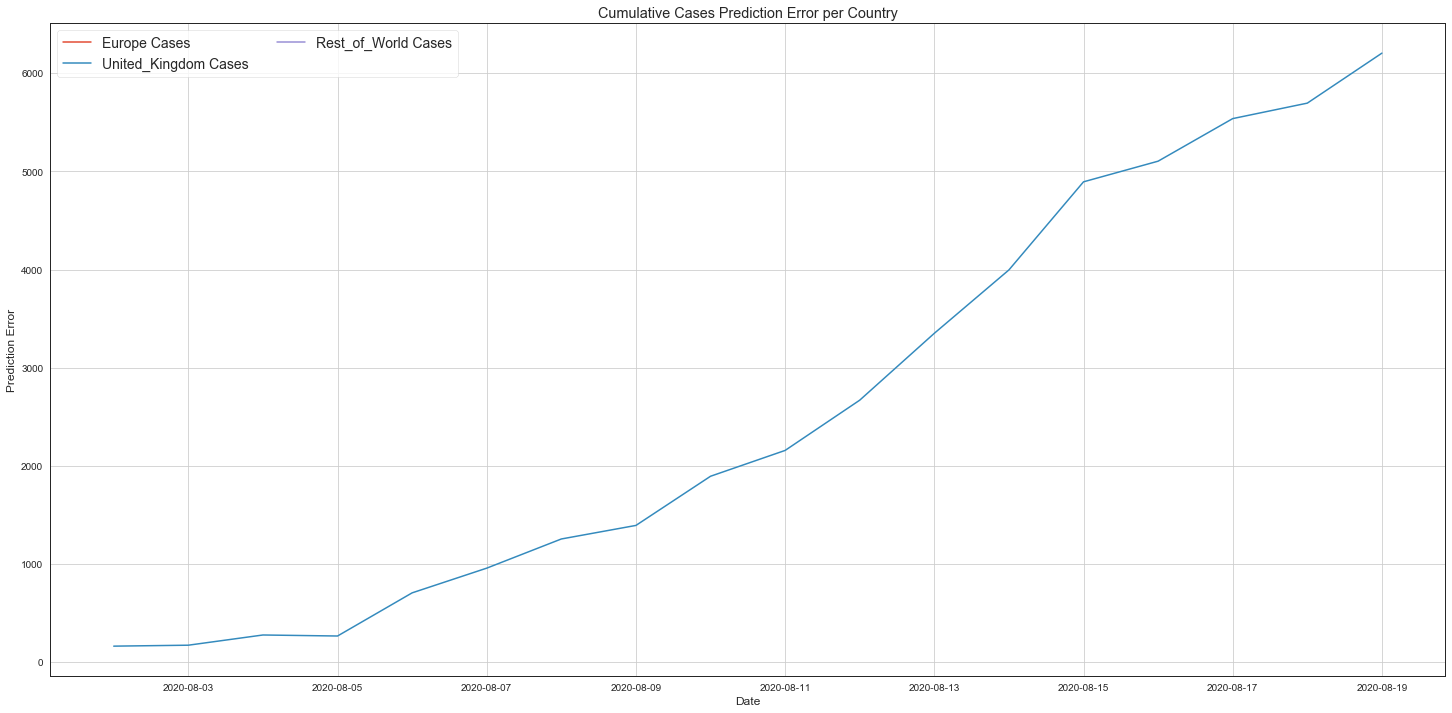

In [361]:
# Visualising the Linear Regression results
plt.figure(figsize=(25, 12))
for country in top_count:
    plt.plot(df_global[df_global["countriesAndTerritories"] == country]["dateRep"],
             df_global[df_global["countriesAndTerritories"] == country]['cumulative_error'], label=f"{country} {target.capitalize()}")
plt.title('Cumulative ' + target.capitalize() + ' Prediction Error per Country')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.grid()
plt.legend(ncol=2)
#plt.savefig('cumulative_error_20_nn_countries_dpi300.jpeg', dpi=300)

In [294]:
## Check for the directory and output the df_global dataframe.
if os.path.exists(os.path.join(data_folder, "model_predictions")) is False:
    os.mkdir(os.path.join(data_folder, "model_predictions"))
df_global.to_csv(os.path.join(data_folder, "model_predictions", "Rein_nn_predictions.csv"))

In [299]:
#plt.style.use("ggplot")
set_style("whitegrid")

NameError: name 'set_style' is not defined

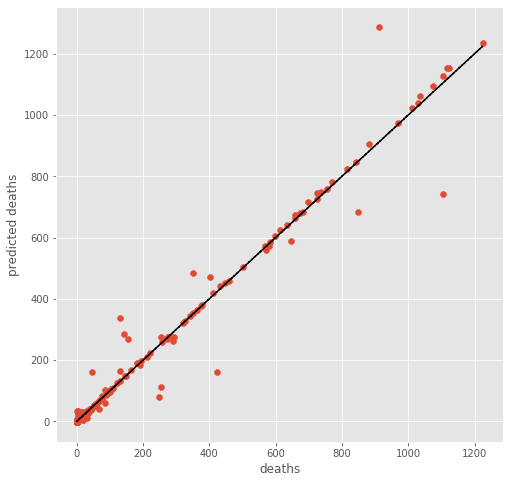

In [298]:
## Plot deaths vs predicted.
plt.figure(figsize=(8, 8))
plt.scatter(df.deaths, df.deaths_pred)
plt.plot(df.deaths, df.deaths, color="black", linestyle="--")
plt.xlabel("deaths")
plt.ylabel("predicted deaths")
plt.show()